In [ ]:
import zipfile
import os
with zipfile.ZipFile("prodata.zip", 'r') as zip_ref:
    zip_ref.extractall("/content/data")  


In [ ]:
import numpy as np
import cv2
from tensorflow.keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D
from keras.optimizers import Adam
from keras.layers import MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator


train_dir = 'data/train'
val_dir = 'data/test'
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(48,48),
        batch_size=64,
        color_mode="grayscale",
        class_mode='categorical')

validation_generator = val_datagen.flow_from_directory(
        val_dir,
        target_size=(48,48),
        batch_size=64,
        color_mode="grayscale",
        class_mode='categorical')

emotion_model = Sequential()

emotion_model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(48,48,1)))
emotion_model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
emotion_model.add(MaxPooling2D(pool_size=(2, 2)))
emotion_model.add(Dropout(0.25))

emotion_model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
emotion_model.add(MaxPooling2D(pool_size=(2, 2)))
emotion_model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
emotion_model.add(MaxPooling2D(pool_size=(2, 2)))
emotion_model.add(Dropout(0.25))

emotion_model.add(Flatten())
emotion_model.add(Dense(1024, activation='relu'))
emotion_model.add(Dropout(0.5))
emotion_model.add(Dense(7, activation='softmax'))

cv2.ocl.setUseOpenCL(False)

emotion_dict = {0: "Angry", 1: "Disgusted", 2: "Fearful", 3: "Happy", 4: "Neutral", 5: "Sad", 6: "Surprised"}




Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
emotion_model.save('emotion_model.weight.h5')


In [ ]:
from tensorflow.keras.optimizers.schedules import ExponentialDecay
from tensorflow.keras.optimizers import Adam

lr_schedule = ExponentialDecay(
    initial_learning_rate=0.0001,
    decay_steps=100000,
    decay_rate=0.96,
    staircase=True
)

emotion_model.compile(
    loss='categorical_crossentropy',
    optimizer=Adam(learning_rate=lr_schedule),
    metrics=['accuracy']
)

emotion_model_info = emotion_model.fit(
    train_generator,
    steps_per_epoch=28709 // 64, 
    epochs=50,
    validation_data=validation_generator,
    validation_steps=7178 // 64  
)



Epoch 1/50
448/448 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.4827 - loss: 1.3554 - val_accuracy: 0.4900 - val_loss: 1.3349
Epoch 2/50
448/448 ━━━━━━━━━━━━━━━━━━━━ 0s 706us/step - accuracy: 0.5000 - loss: 1.2451 - val_accuracy: 0.4000 - val_loss: 1.4641
Epoch 3/50
448/448 ━━━━━━━━━━━━━━━━━━━━ 14s 30ms/step - accuracy: 0.5027 - loss: 1.3174 - val_accuracy: 0.5135 - val_loss: 1.2786
Epoch 4/50
448/448 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6250 - loss: 1.1209 - val_accuracy: 0.3000 - val_loss: 1.5791
Epoch 5/50
448/448 ━━━━━━━━━━━━━━━━━━━━ 13s 29ms/step - accuracy: 0.5159 - loss: 1.2797 - val_accuracy: 0.5218 - val_loss: 1.2513
Epoch 6/50
448/448 ━━━━━━━━━━━━━━━━━━━━ 0s 32us/step - accuracy: 0.4062 - loss: 1.4913 - val_accuracy: 0.6000 - val_loss: 1.3654
Epoch 7/50
448/448 ━━━━━━━━━━━━━━━━━━━━ 21s 29ms/step - accuracy: 0.5373 - loss: 1.2335 - val_accuracy: 0.5353 - val_loss: 1.2305
Epoch 8/50
448/448 ━━━━━━━━━━━━━━━━━━━━ 0s 32us/step - accuracy: 0.6250 - loss: 1.1683 - val_

In [ ]:
import json
history_dict = emotion_model_info.history
with open(os.path.join('training_history.json'), 'w') as f:
    json.dump(history_dict, f)




In [ ]:

emotion_model.save('emotion_model2.h5')

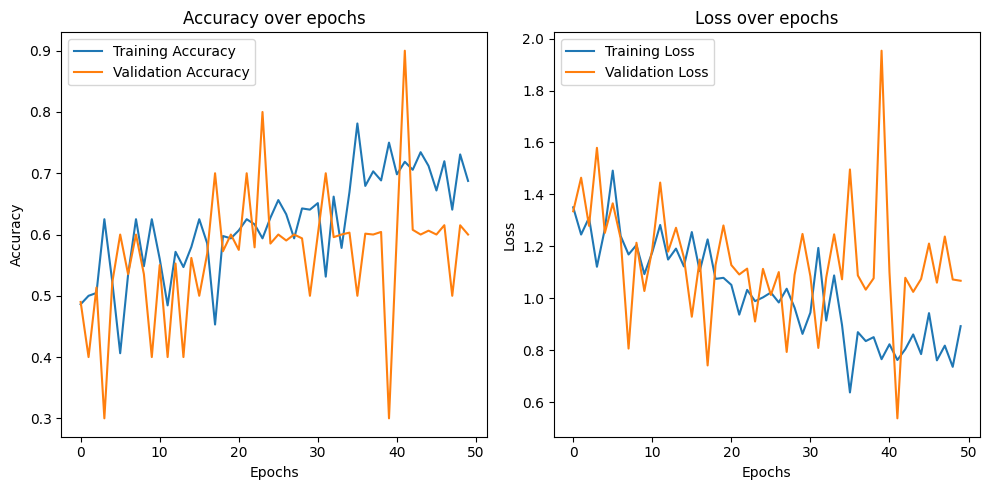

In [ ]:
import matplotlib.pyplot as plt
def plot_training_history(history_dict):
    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.plot(history_dict['accuracy'], label='Training Accuracy')
    plt.plot(history_dict['val_accuracy'], label='Validation Accuracy')
    plt.title('Accuracy over epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history_dict['loss'], label='Training Loss')
    plt.plot(history_dict['val_loss'], label='Validation Loss')
    plt.title('Loss over epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

plot_training_history(history_dict)